In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [3]:
vis_meta = {'broad_broad_cp_140k':{'color':'#3BCDFF', 'size':0.1, 'alpha':0.1},
 'broad_CK1a_HTS_SPR_binder':{'color':'#9E77C3', 'size':10.0, 'alpha':1.0},
 'broad_CK1d_HTS_SPR_binder':{'color':'#9E77C3', 'size':10.0, 'alpha':1.0},
 'literature_CK1a_pharos': {'color':'#E584C8', 'size':10.0, 'alpha':1.0},
 'literature_CK1d_pharos': {'color':'#E584C8', 'size':10.0, 'alpha':1.0},
 'hitgen_CK1a_orthosteric':{'color':'#FF0000', 'size':0.01, 'alpha':0.1},
 'hitgen_CK1d_orthosteric':{'color':'#FF0000', 'size':0.01, 'alpha':0.1},
 'hitgen_negative':{'color':'#0B7743', 'size':0.1, 'alpha':0.1},
 'msigma_CK1a_orthosteric':{'color':'#FF8B25', 'size':0.01, 'alpha':0.1},
 'msigma_CK1d_orthosteric':{'color':'#FF8B25', 'size':0.01, 'alpha':0.1},
 'msigma_negative':{'color':'#8B8B8B', 'size':0.1, 'alpha':0.1},
 'dos-del_CK1a_orthosteric':{'color':'#2075B4', 'size':0.1, 'alpha':0.1},
 'dos-del_CK1d_orthosteric':{'color':'#2075B4', 'size':0.1, 'alpha':0.1},
 'dos-del_negative':{'color':'#BCBD21', 'size':0.1, 'alpha':0.1},
 }

In [4]:
def get_data(data_selected, data, data_meta):
    data_new = []
    data_start_idx = 0
    for d_name, d_len in data_meta:
        if d_name != data_selected:
            data_start_idx += d_len
        else:
            print("Found data: ", d_name, " with length: ", d_len, " at index: ", data_start_idx)
            data_new = data[data_start_idx:data_start_idx+d_len]
    return data_new

## CK1a

In [5]:
with open("./data_embedded_CK1a.pkl", "rb") as f:
    data_embedded = pickle.load(f)
with open("./data_embedded_meta_CK1a.pkl", 'rb') as f:
    data_embedded_meta = pickle.load(f)

In [6]:
CK1a_experiment = ['broad_broad_cp_140k',
                   'dos-del_negative','dos-del_CK1a_orthosteric',
                   'msigma_negative','msigma_CK1a_orthosteric',
                   'hitgen_negative','hitgen_CK1a_orthosteric',
                   'broad_CK1a_HTS_SPR_binder','literature_CK1a_pharos']


Found data:  broad_broad_cp_140k  with length:  141846  at index:  206
Found data:  dos-del_negative  with length:  98872  at index:  240066
Found data:  dos-del_CK1a_orthosteric  with length:  98000  at index:  142066
Found data:  msigma_negative  with length:  9979  at index:  342142
Found data:  msigma_CK1a_orthosteric  with length:  3204  at index:  338938
Found data:  hitgen_negative  with length:  350649  at index:  702121
Found data:  hitgen_CK1a_orthosteric  with length:  350000  at index:  352121
Found data:  broad_CK1a_HTS_SPR_binder  with length:  206  at index:  0
Found data:  literature_CK1a_pharos  with length:  14  at index:  142052


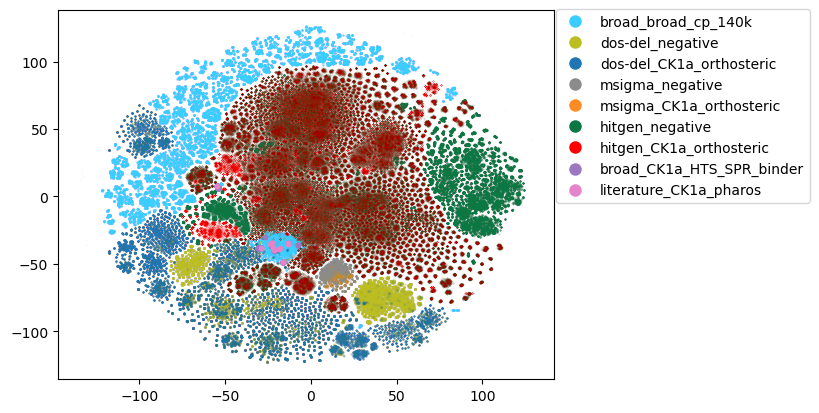

In [7]:
for experiment in CK1a_experiment:
    data_vis = get_data(experiment, data_embedded, data_embedded_meta)
    vis = vis_meta[experiment]
    plt.scatter(data_vis[:,0], data_vis[:,1], c=vis['color'], s=vis['size'], alpha=vis['alpha'])

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=experiment, 
                          markerfacecolor=vis_meta[experiment]['color'], markersize=10) for i, experiment in enumerate(CK1a_experiment)]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.53, 1.02))


## CK1d

In [9]:
with open("./data_embedded_CK1d.pkl", "rb") as f:
    data_embedded = pickle.load(f)
with open("./data_embedded_meta_CK1d.pkl", 'rb') as f:
    data_embedded_meta = pickle.load(f)

Found data:  broad_broad_cp_140k  with length:  141846  at index:  231
Found data:  dos-del_negative  with length:  98872  at index:  200511
Found data:  dos-del_CK1d_orthosteric  with length:  58189  at index:  142322
Found data:  msigma_negative  with length:  9979  at index:  302916
Found data:  msigma_CK1d_orthosteric  with length:  3533  at index:  299383
Found data:  hitgen_negative  with length:  350649  at index:  662895
Found data:  hitgen_CK1d_orthosteric  with length:  350000  at index:  312895
Found data:  broad_CK1d_HTS_SPR_binder  with length:  231  at index:  0
Found data:  literature_CK1d_pharos  with length:  245  at index:  142077


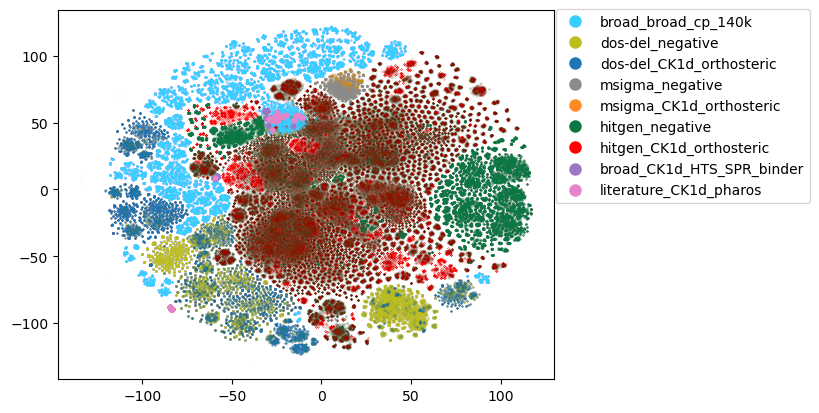

In [10]:
CK1d_experiment = ['broad_broad_cp_140k',
                   'dos-del_negative','dos-del_CK1d_orthosteric',
                   'msigma_negative', 'msigma_CK1d_orthosteric',
                   'hitgen_negative', 'hitgen_CK1d_orthosteric',
                   'broad_CK1d_HTS_SPR_binder', 'literature_CK1d_pharos']

for experiment in CK1d_experiment:
    data_vis = get_data(data_selected=experiment, data=data_embedded, data_meta=data_embedded_meta)
    vis = vis_meta[experiment]
    plt.scatter(data_vis[:,0], data_vis[:,1], c=vis['color'], s=vis['size'], alpha=vis['alpha'])

legend_elements = [Line2D([0], [0], marker='o', color='w', label=experiment, 
                          markerfacecolor=vis_meta[experiment]['color'], markersize=10) for i, experiment in enumerate(CK1d_experiment)]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.53, 1.02))